# Monthly data generation

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [11]:
df_metricas_mensuales= pd.read_parquet('data/monthly_metrics.parquet')

In [12]:
df_metricas_3m= pd.read_parquet('data/metricas_3m.parquet')

In [13]:
df_metricas_mensuales

,clasificacion,departamento,municipio,station,mes,r2,r2_ajustado,rmse,mae,std_error,kge,spearman,bias,mape,maape,source
0,A,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,1,-0.432291,-0.611327,104.202734,85.149000,97.009215,0.082316,-0.066667,-38.045000,50.349702,0.446402,agera5
1,A,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2,-0.219753,-0.372223,67.194785,59.931000,61.914935,0.222341,0.163636,-26.109000,69.225511,0.504275,agera5
2,A,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,3,0.024200,-0.084222,113.514574,96.960000,113.409082,0.267899,0.527273,4.892728,76.020062,0.540922,agera5
3,A,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,4,-0.203629,-0.337365,74.644062,48.032727,65.958708,0.428948,0.518182,34.945454,229.735901,0.420815,agera5
4,A,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,5,-0.091494,-0.200644,584.099227,249.586666,576.888700,-0.616465,0.020979,-91.495000,268.901403,0.916252,agera5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,B,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,8,0.386144,0.263373,39.844381,32.849650,39.657964,0.425404,0.714286,-3.849754,62.377711,0.410991,chirps
1004,B,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,9,-1.042684,-1.334496,71.812709,48.785188,59.434199,0.059785,0.000000,40.306839,201.681923,0.469734,chirps
1005,B,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,10,-2.386329,-2.870091,70.071233,56.439062,64.384167,-0.053536,0.000000,27.652428,40.181180,0.358392,chirps
1006,B,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,11,0.144924,0.022770,109.159472,94.198553,99.525961,0.179913,0.866667,44.837188,546.526087,0.951603,chirps


In [16]:
df_metricas_mensuales.columns

Index(['clasificacion', 'departamento', 'municipio', 'station', 'mes', 'r2',
       'r2_ajustado', 'rmse', 'mae', 'std_error', 'kge', 'spearman', 'bias',
       'mape', 'maape', 'source'],
      dtype='object')

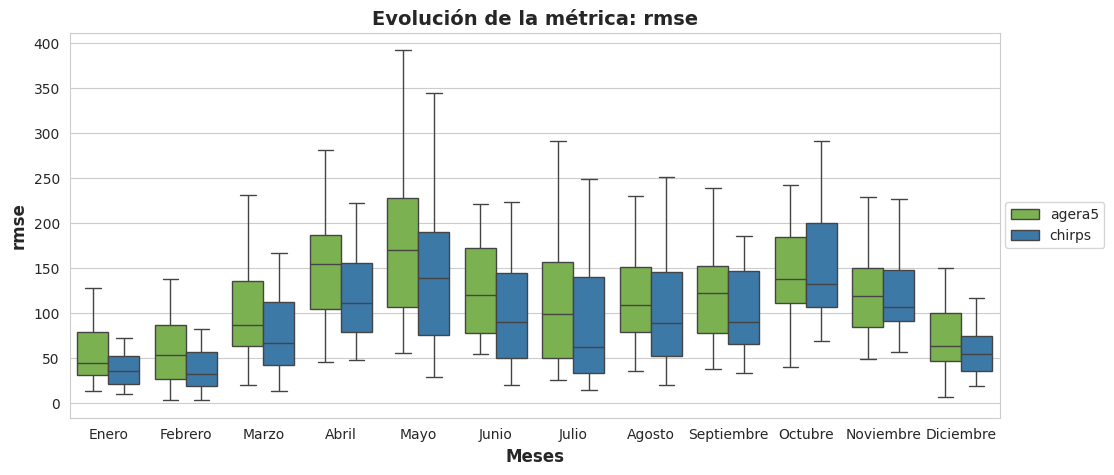

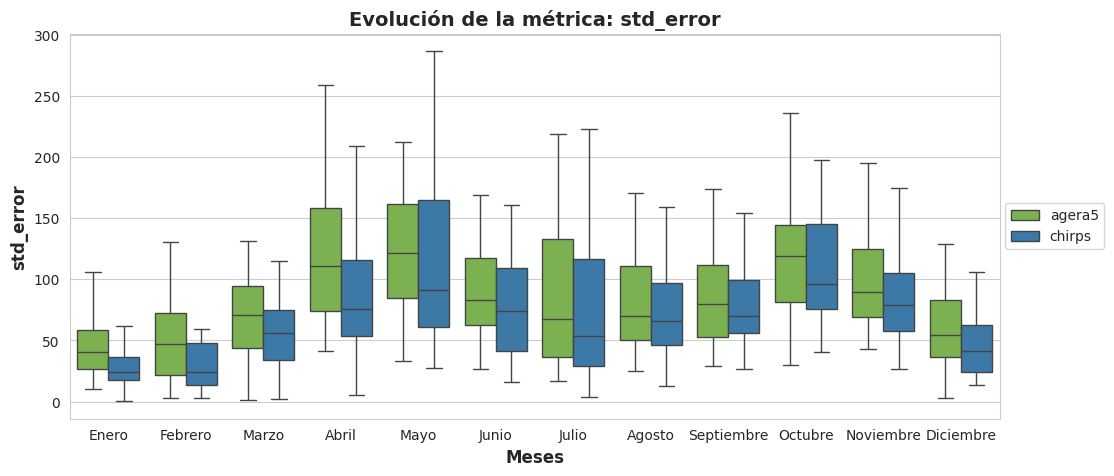

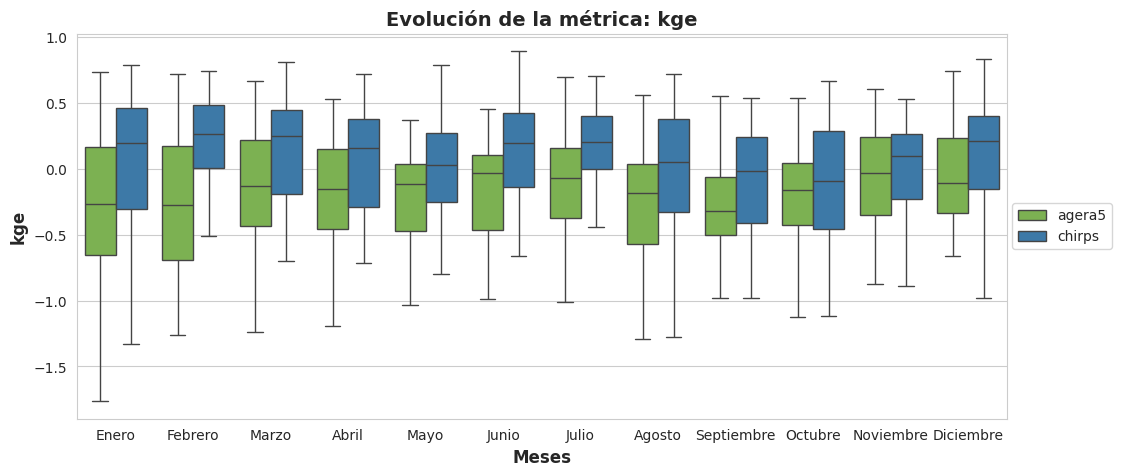

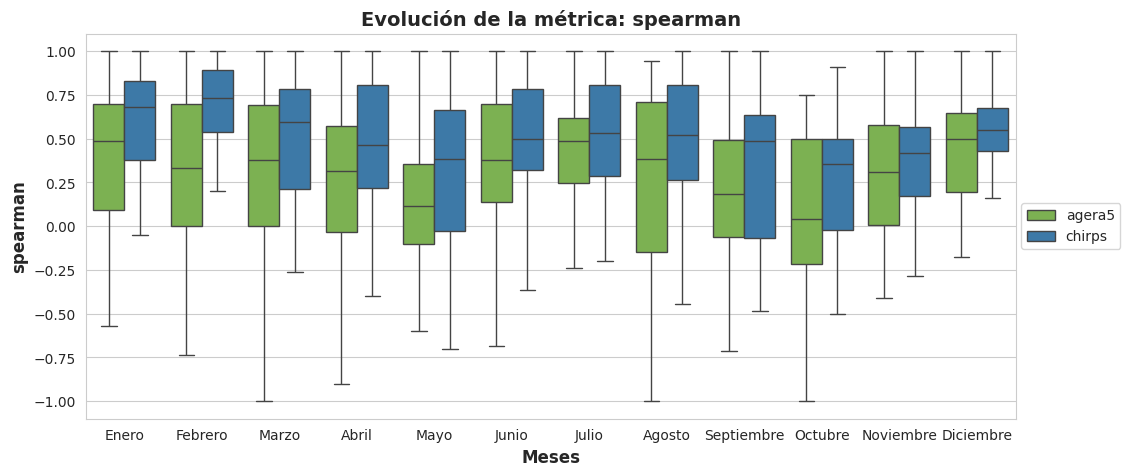

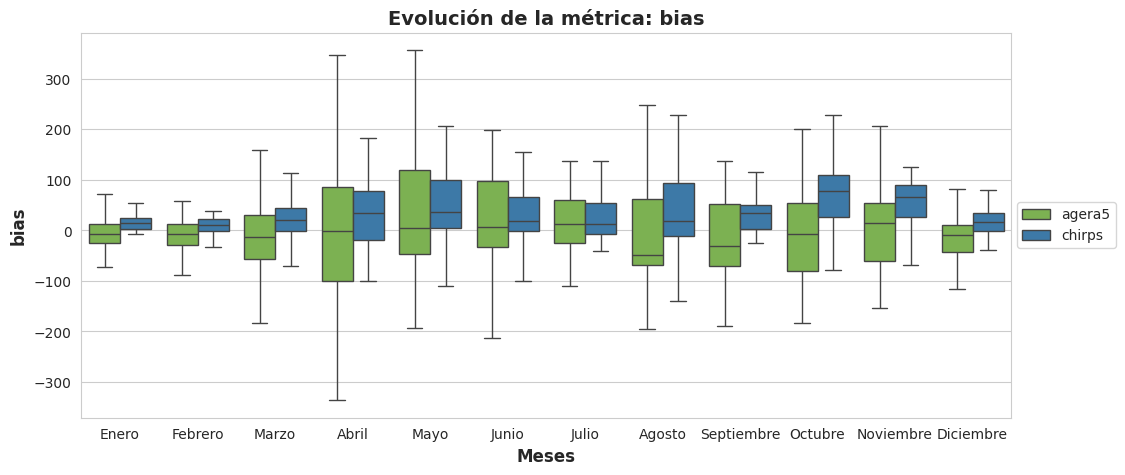

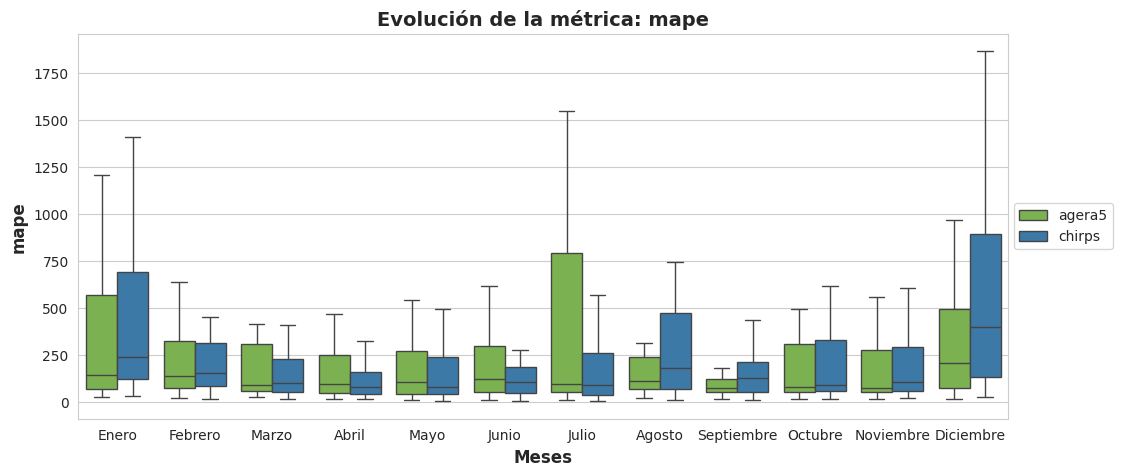

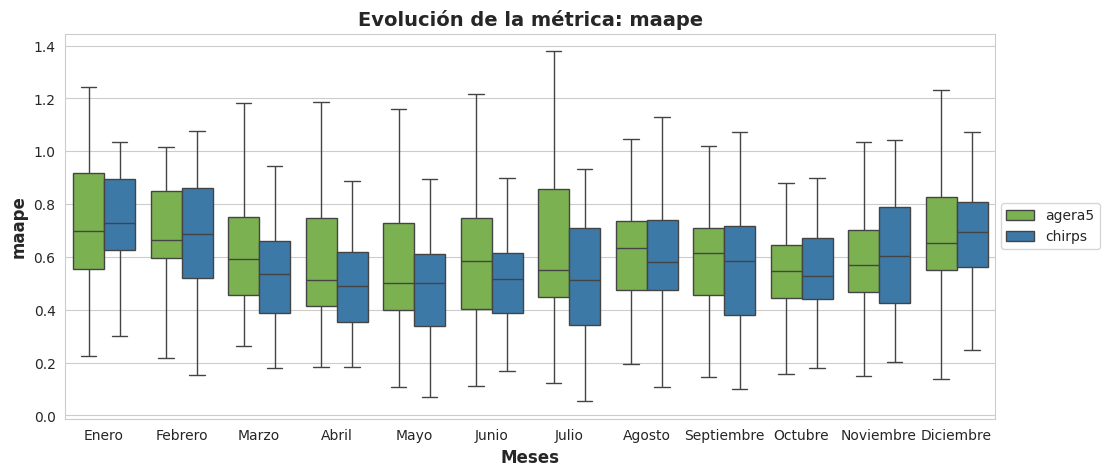

In [18]:
# Diccionario para mapear números de meses a nombres
meses_dict = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Reemplazar los números de mes por los nombres en el dataframe reestructurado
df_metricas_mensuales['mes'] = df_metricas_mensuales['mes'].replace(meses_dict)

# Función para generar boxplots con los nombres de meses
def boxplots_months(df, tipo_periodo="mes"):
    for metric in [ 'rmse', 'std_error', 'kge', 'spearman', 'bias','mape', 'maape']:  # Iterar por las métricas (excluyendo columnas como 'station' y 'mes/trimestre')
        sns.set_style('whitegrid')
        fig, ax = plt.subplots(1, figsize=(12, 5))

        # Definir paleta de colores
        palette = {"chirps": "#2B7BB9", "agera5": "#7AC142"}

        # Crear el boxplot para la métrica actual
        fig = sns.boxplot(
            data=df,
            x=tipo_periodo,  # Columna 'mes' para gráficos mensuales, 'trimestre' para trimestrales
            y=f'{metric}',  # Métrica que se está evaluando
            hue='source',  # Columnas que indican la fuente
            showfliers=False,
            palette=palette
        )
        
        # Ajustar etiquetas y título
        fig.set_xlabel('Meses' if tipo_periodo == "mes" else 'Trimestres', fontsize=12, fontweight='bold')
        fig.set_ylabel(f'{metric}', fontsize=12, fontweight='bold')
        fig.set_title('Evolución de la métrica: ' + f'{metric}', fontsize=14, fontweight='bold')

        # Ordenar la leyenda
        handles, labels = plt.gca().get_legend_handles_labels()
        order = ["agera5", "chirps"]  # Orden de las fuentes
        handles = [handles[labels.index(label)] for label in order]
        labels = order
        fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.12, 0.5))

        # Mostrar el gráfico
        plt.show()

# Usar la función para gráficos mensuales con los nombres de los meses
boxplots_months(df_metricas_mensuales, tipo_periodo="mes")


In [20]:
df_metricas_3m

,categoria,departamento,municipio,station,trimestre,r2,r2_ajustado,rmse,mae,std,kge,spearman,bias,source
0,A,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,EFM,0.022145,-0.011574,97.629093,81.205161,95.770596,0.414461,0.374836,-18.958710,agera5
1,A,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,AMJ,-0.049119,-0.080911,348.268725,123.016571,348.265532,-0.313498,0.376751,1.491428,agera5
2,A,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,JAS,0.011922,-0.021014,49.169865,31.197812,49.168747,0.057963,0.384531,0.331563,agera5
3,A,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,OND,0.014688,-0.016103,111.086381,90.622647,101.960887,0.259574,0.452406,-44.092647,agera5
4,B,HUILA,PALERMO,FEDEARROZ_PALERMO_ASOJUNCAL,EFM,-0.170571,-0.217394,135.461225,90.033334,135.233902,0.141719,0.252137,-7.844444,agera5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,D,MAGDALENA,EL RETEN,FEDEARROZ_EL_RETEN_EL_VOLGA,OND,-0.162680,-0.200186,115.872545,63.954236,105.440302,0.360802,0.746658,48.049864,chirps
332,B,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,EFM,-0.031041,-0.080138,10.863351,5.712186,9.877823,-0.078326,0.509923,-4.521174,chirps
333,B,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,AMJ,0.340014,0.307015,56.297820,45.393865,54.767528,0.383476,0.508752,13.036965,chirps
334,B,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,JAS,-0.027301,-0.078666,53.320651,38.143806,51.329799,0.473695,0.610390,14.434113,chirps


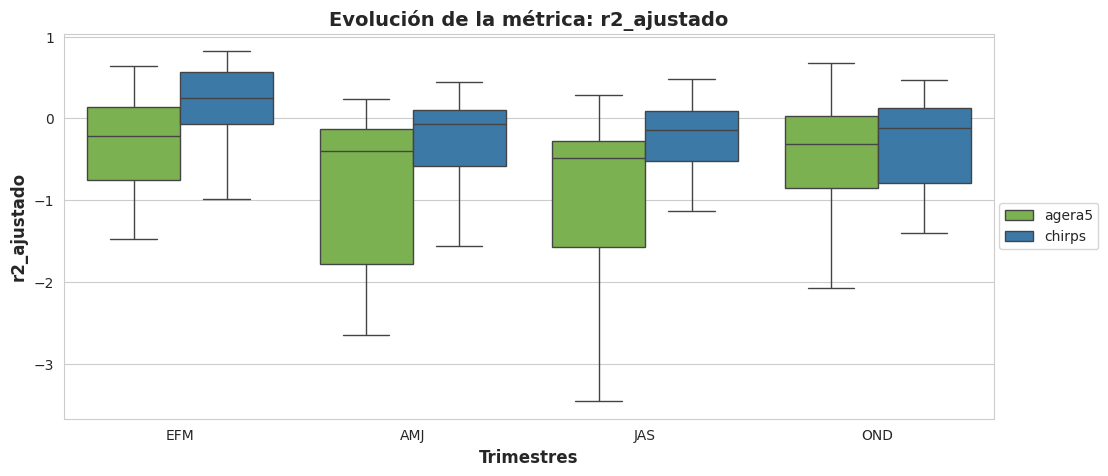

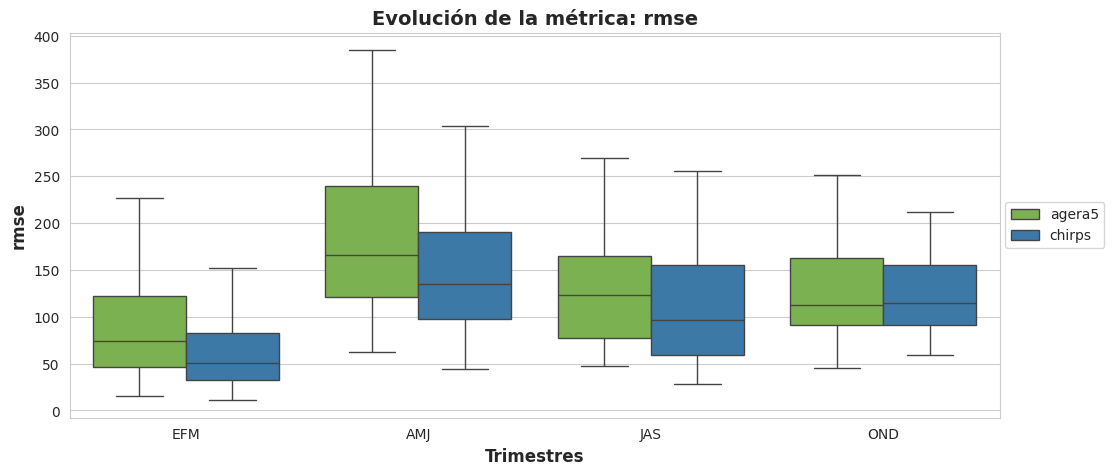

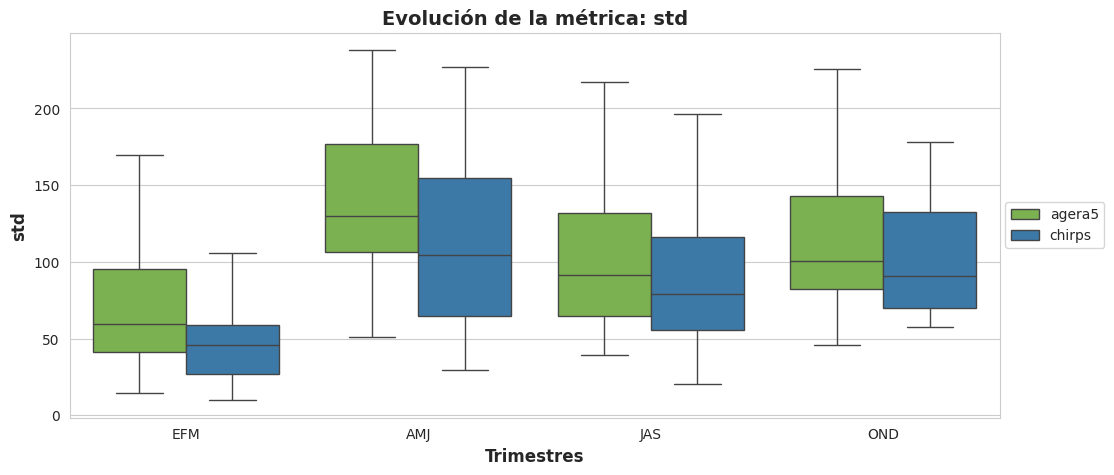

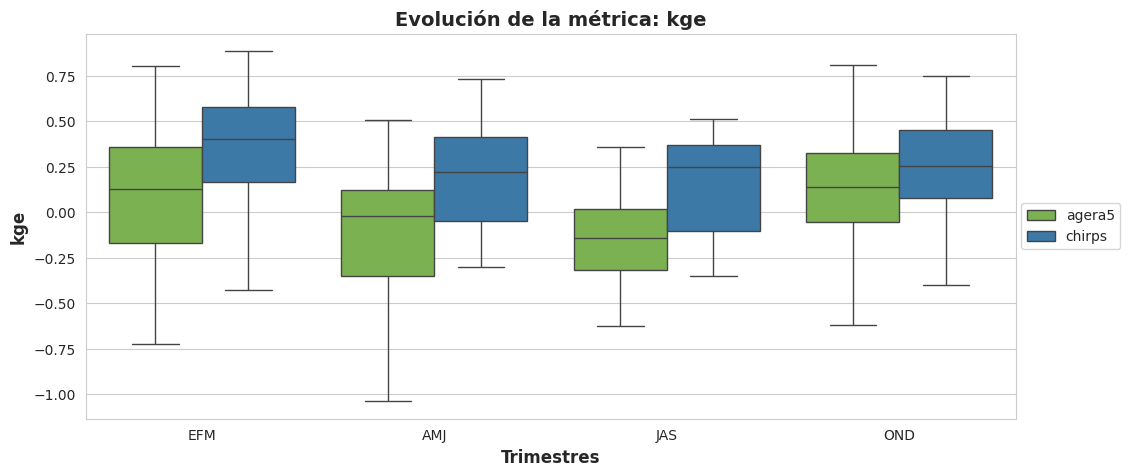

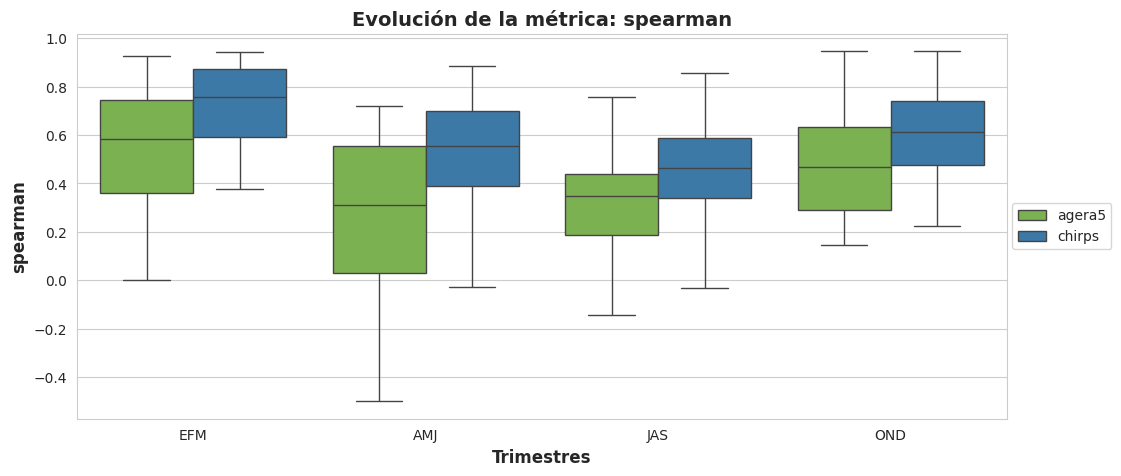

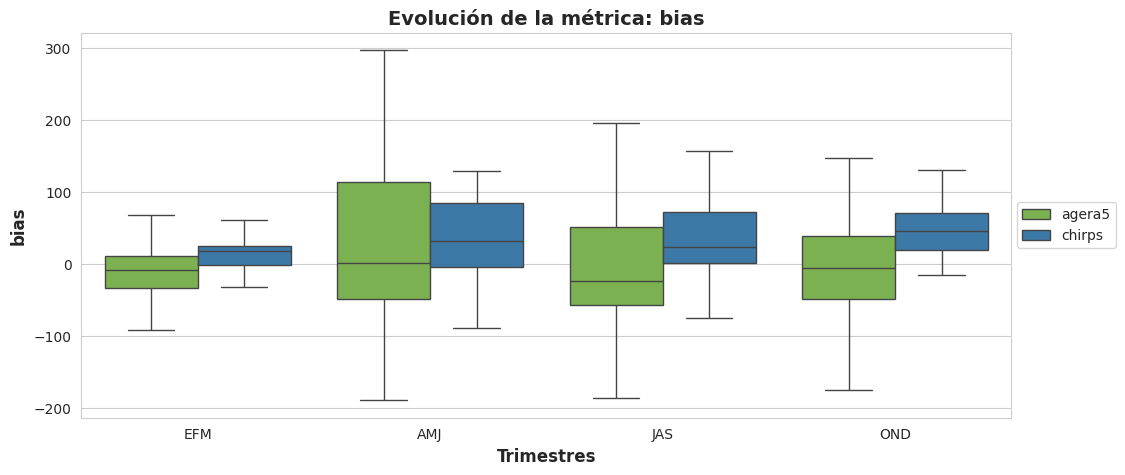

In [21]:
# Función para generar boxplots con los trimestres
def boxplots_trimestres(df, tipo_periodo="trimestre"):
    for metric in ['r2_ajustado','rmse','std','kge','spearman','bias']:  # Iterar por las métricas (excluyendo columnas como 'station' y 'trimestre/source')
        sns.set_style('whitegrid')
        fig, ax = plt.subplots(1, figsize=(12, 5))

        # Definir paleta de colores (verde y azul del mapa)
        palette = {"chirps": "#2B7BB9", "agera5": "#7AC142"}

        # Crear el boxplot para la métrica actual
        fig = sns.boxplot(
            data=df,
            x=tipo_periodo,  # Columna 'trimestre'
            y=f'{metric}',  # Métrica que se está evaluando
            hue='source',  # Columnas que indican la fuente
            showfliers=False,
            palette=palette
        )
        
        # Ajustar etiquetas y título
        fig.set_xlabel('Trimestres', fontsize=12, fontweight='bold')
        fig.set_ylabel(f'{metric}', fontsize=12, fontweight='bold')
        fig.set_title('Evolución de la métrica: ' + f'{metric}', fontsize=14, fontweight='bold')

        # Ordenar la leyenda
        handles, labels = plt.gca().get_legend_handles_labels()
        order = ["agera5", "chirps"]  # Orden de las fuentes
        handles = [handles[labels.index(label)] for label in order]
        labels = order
        fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.12, 0.5))

        # Mostrar el gráfico
        plt.show()

# Usar la función para gráficos trimestrales
boxplots_trimestres(df_metricas_3m, tipo_periodo="trimestre")


In [ ]:
caribe seco... nte santander, cesar guajira, magdalena
carbe humedo.... cordoba sucre, antioquia
centro
llanos